# Constant Energy Q-plane

After one has gotten an overview of the data measured through the Viewer3D (explained in QuickView3D.html the next step is to plot only as single plane of constant energy as function of H, K, and L or $Q_x$ and $Q_y$ and depending on the boolean state of the “rlu” key word argument. Two different binning methods are currently provided: Polar and XY. What is done is that the points measured are binned either. For explanation of units and size of bins, see below



In [1]:
%matplotlib inline


from MJOLNIR.Data import DataSet
from MJOLNIR import _tools # Usefull tools useful across MJOLNIR
import numpy as np
import matplotlib.pyplot as plt

## Set larger figure for this tutorial
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['figure.dpi'] = 200


Next, loading of the data files and converting using binning 8

In [2]:
numbers = '483-489,494-500' # String of data numbers
fileList = _tools.fileListGenerator(numbers,r'C:\Users\lass_j\Documents\CAMEA2018',2018) # Create file list from 2018 in specified folder


# Create the data set
ds = DataSet.DataSet(fileList)
ds.convertDataFile(binning=8)

Setting up the constant energy cut, one needs to provide the energy range over which the data are integrated as well as the size of the pixels. First example utilizes polar binning where x corresponds to the radial direction and y the tangental, i.e. angular, direction.

In [3]:

# Choose energy limits for binning
EMin = 3.5
EMax = 4.0
# Generate a figure making use of binning in polar coordinates
Data,ax = ds.plotQPlane(EMin=EMin, EMax=EMax,xBinTolerance=0.03,yBinTolerance=0.03,
                        binning='polar',vmin=2e-7,vmax=1e-5, colorbar= True)

The above figure is a bit too far zoomed out. Luckily, the axis has a method to zoom to include a given RLU point

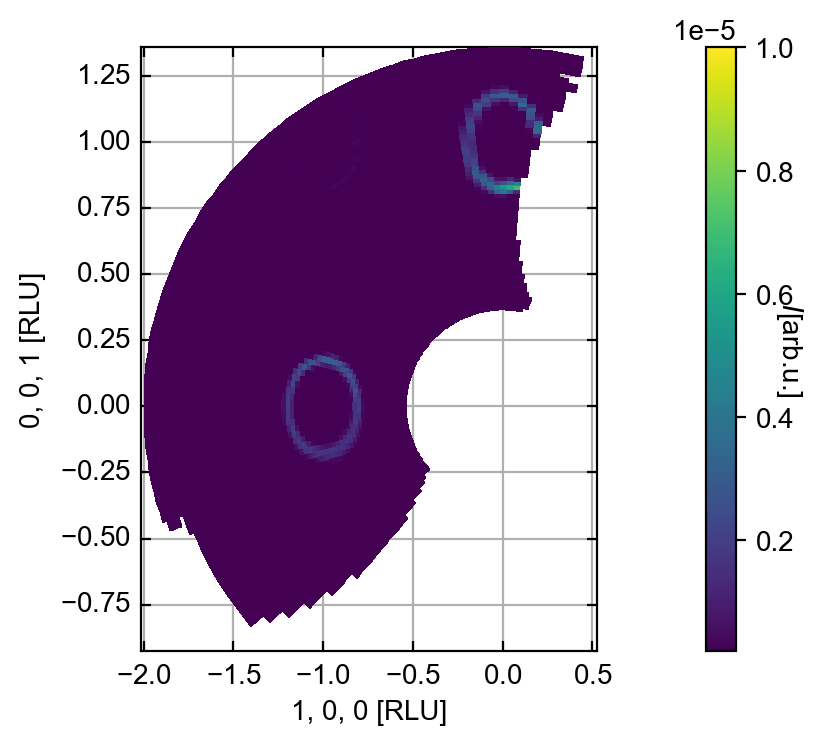

In [4]:
ax.set_xlim(-2.6,0.68)
ax.set_ylim(-1.76,2.58)
ax.get_figure()

Next, generating the same figure as above but utilizing pixels as defined in $Q_x$ and $Q_y$

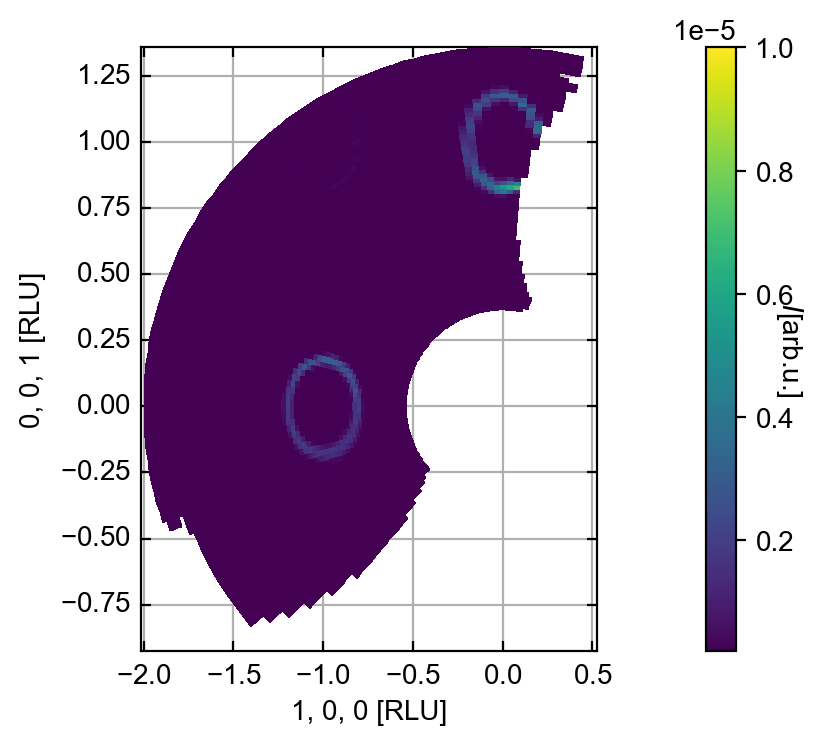

In [5]:
Data2,ax2 =  ds.plotQPlane(EMin=EMin, EMax=EMax,xBinTolerance=0.03,yBinTolerance=0.03,
                           binning='xy',vmin=2e-7,vmax=1e-5,colorbar=True)

ax.get_figure()

## Binnings explained

The bin sizes depends on the other parameters provided to the method. The tables below seeks to show all of the possibilities:

| Binning (rlu=False) | Parameter     | Unit | Limits       | Comment             |
|---------------------|---------------|------|--------------|---------------------|
| XY                  | xBinTolerance | 1/AA | (0,$\infty$) | Binning along $Q_x$ |
| XY                  | yBinTolerance | 1/AA | (0,$\infty$) | Binning along $Q_y$ |
| Ploar               | xBinTolerance | rad  | (0,2$\pi$]   | Angular Binning     |
| Ploar               | yBinTolerance | 1/AA | (0,$\infty$) | Radial Binning      |

With rlu true

| Binning (rlu=True) | Parameter     | Unit | Limits       | Comment                                |
|--------------------|---------------|------|--------------|----------------------------------------|
| XY                 | xBinTolerance | RLU  | (0,$\infty$) | Binning along first projection vector  |
| XY                 | yBinTolerance | RLU  | (0,$\infty$) | Binning along second projection vector |
| Ploar              | xBinTolerance | rad  | (0,2$\pi$]   | Angular Binning                        |
| Ploar              | yBinTolerance | RLU  | (0,$\infty$) | Radial Binning                         |


For further explanation of the RLU axis see [Reciprocal Lattice Unit Axis](ReciprocalLatticeUnitAxis.html)